# Introductioin to Text Mining

## Learning Objectives

1. What natural language processing (NLP) is
2. Tokenizing your text into words
3. Dealing with nonstandard punctuation and emoticons
4. Compressing your token vocabulary with stemming and lemmatization
5. Building a sentiment analyzer

### What NLP is

Natural language processing is an area of research in computer science and artificial intelligence (AI) concerned with processing natural languages such as English or Mandarin. This processing generally involves translating natural language into data (numbers) that a computer can use to learn about the world. And this understanding of the world is sometimes used to generate natural language text that reflects that understanding.

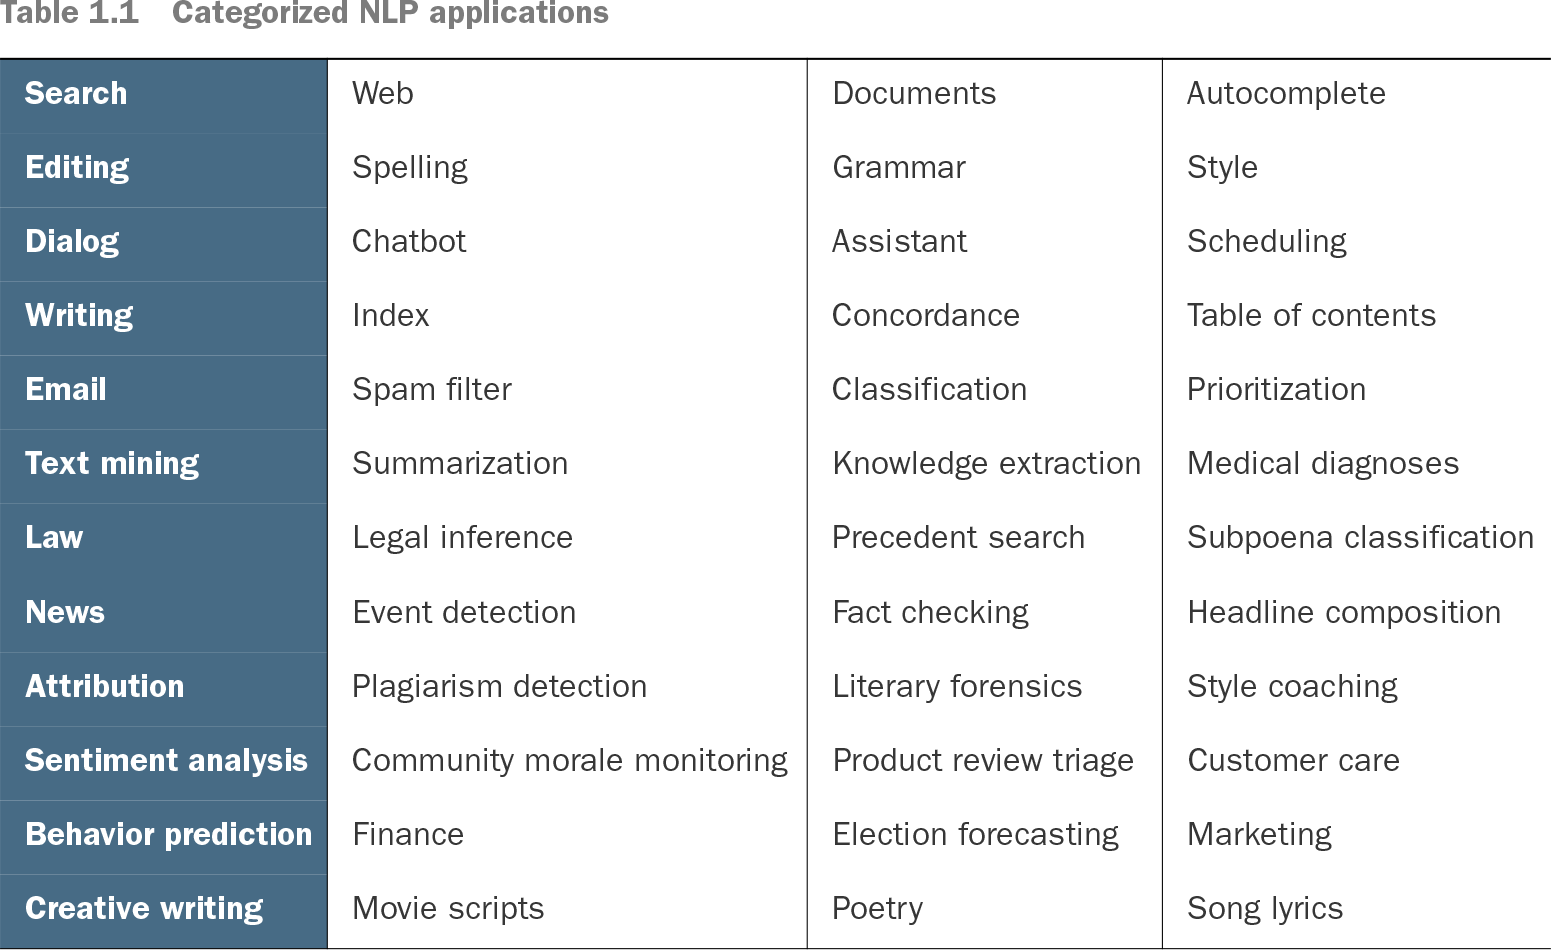

### Building your vocabulary with a tokenizer

In [2]:
sentence = """Thomas Jefferson began building Monticello at the age of 26. """
token_sequence = sentence.split()
token_sequence

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [3]:
import numpy as np
vocab = sorted(set(token_sequence))
num_tokens = len(token_sequence)
vocab_size = len(vocab)

onehot_vectors = np.zeros((num_tokens, vocab_size), int)
for i, word in enumerate(token_sequence):
    onehot_vectors[i, vocab.index(word)] = 1
    
onehot_vectors

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
import pandas as pd
df = pd.DataFrame(pd.Series(dict([(token, 1) for token in sentence.split()])), columns=['sent']).T

df

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent,1,1,1,1,1,1,1,1,1,1


In [5]:
sentence_bow = {}
for token in sentence.split():
    sentence_bow[token] = 1
# print(sentence_bow)
sentence_bow = sorted(sentence_bow.items())

sentence_bow

[('26.', 1),
 ('Jefferson', 1),
 ('Monticello', 1),
 ('Thomas', 1),
 ('age', 1),
 ('at', 1),
 ('began', 1),
 ('building', 1),
 ('of', 1),
 ('the', 1)]

### A token improvement

In [102]:
import re
tokens = re.split(r'[-\s.,;!?]+', sentence)

# tokens

In [103]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
tokenizer_sentence = tokenizer.tokenize(sentence)

# tokenizer_sentence

In [104]:
from nltk.tokenize import TreebankWordTokenizer
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
tokenizer = TreebankWordTokenizer()
# tokenizer.tokenize(sentence)


In [105]:
from nltk.tokenize.casual import casual_tokenize
message = """RT @TJMonticello Best day everrrrrrr at Monticello. Awesommmmmmeeeeeeee day :*)"""
# casual_tokenize(message)


In [106]:
# casual_tokenize(message, reduce_len=True, strip_handles=True)

### Stop words

a, an, the, this, and, or, of, on

In [1]:
stop_words = ['a', 'an', 'the', 'on', 'of', 'off', 'this', 'is']
tokens = ['the', 'house', 'is', 'on', 'fire']
tokens_without_stopwords = [x for x in tokens if x not in stop_words]
tokens_without_stopwords

['house', 'fire']

In [4]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
# stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
# len(stop_words)

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
# sklearn_stop_words

ModuleNotFoundError: No module named 'sklearn'

### Normalization

case folding, capitalization

In [111]:
tokens = ['HouSe', 'VisiTor', 'Center']
normalized_tokens = [x.lower() for x in tokens]
# normalized_tokens

### Stemming and Lemmatization

case folding, capitalization

In [7]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
' '.join([stemmer.stem(w).strip("'") for w in "dish washer's washed dishes".split()])

'dish washer wash dish'

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("better", pos = "n")
lemmatizer.lemmatize("better", pos = "a")
lemmatizer.lemmatize("goods", pos = "n")

'good'

### Sentiment Analysis

1. Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.
2. Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

In [114]:
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()
# sa.lexicon

In [115]:
[(tok, score) for tok, score in sa.lexicon.items() if " " in tok]

[("( '}{' )", 1.6),
 ("can't stand", -2.0),
 ('fed up', -1.8),
 ('screwed up', -1.5)]

In [116]:
sa.polarity_scores(text="Python is very readable and it's great for NLP.")

{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}

In [117]:
sa.polarity_scores(text= "Python is not a bad choice for most applications.")

{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.431}

In [118]:
corpus = ["Absolutely perfect! Love it! :-) :-) :-)", 
          "Horrible! Completely useless. :(",
          "It was OK. Some good and some bad things."]
for doc in corpus:
    scores = sa.polarity_scores(doc)
    print('{:+}: {}'.format(scores['compound'], doc))

+0.9428: Absolutely perfect! Love it! :-) :-) :-)
-0.8768: Horrible! Completely useless. :(
-0.1531: It was OK. Some good and some bad things.


# Bag of Words

## Learning Objectives

1. Counting words and term frequencies to analyze meaning
2. Predicting word occurrence probabilities with Zipf’s Law
3. Vector representation of words and how to start using them

In [7]:
from nltk.tokenize import TreebankWordTokenizer
sentence = """The faster Harry got to the store, the faster Harry, the faster, would get home."""
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())
tokens

['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

In [8]:
from collections import Counter
bag_of_words = Counter(tokens)
bag_of_words
# bag_of_words.most_common(4)

Counter({'the': 4,
         'faster': 3,
         'harry': 2,
         'got': 1,
         'to': 1,
         'store': 1,
         ',': 3,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

### Term Frequency (TF)

In [9]:
bag_of_words['harry']

2

In [10]:
times_harry_appears = bag_of_words['harry']
num_unique_words = len(bag_of_words)
tf = times_harry_appears / num_unique_words
tf

0.18181818181818182

A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite’s wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite.

The lift that sustains the kite in flight is generated when air flows around the kite’s surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed by the tension of one or more of the lines or tethers to which the kite is attached. The anchor point of the kite line may be static or moving (such as the towing of a kite by a running person, boat, free-falling anchors as in paragliders and fugitive parakites or vehicle).

The same principles of fluid flow apply in liquids and kites are also used under water.

A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite lifting surface is called a kytoon.

Kites have a long and varied history and many different types are flown individually and at festivals worldwide. Kites may be flown for recreation, art or other practical uses. Sport kites can be flown in aerial ballet, sometimes as part of a competition. Power kites are multi-line steerable kites designed to generate large forces which can be used to power activities such as kite surfing, kite landboarding, kite fishing, kite buggying and a new trend snow kiting. Even Man-lifting kites have been made.

Wikipedia

In [187]:
kite_text = """A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite’s wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite.

The lift that sustains the kite in flight is generated when air flows around the kite’s surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed by the tension of one or more of the lines or tethers to which the kite is attached. The anchor point of the kite line may be static or moving (such as the towing of a kite by a running person, boat, free-falling anchors as in paragliders and fugitive parakites or vehicle).

The same principles of fluid flow apply in liquids and kites are also used under water.

A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite lifting surface is called a kytoon.

Kites have a long and varied history and many different types are flown individually and at festivals worldwide. Kites may be flown for recreation, art or other practical uses. Sport kites can be flown in aerial ballet, sometimes as part of a competition. Power kites are multi-line steerable kites designed to generate large forces which can be used to power activities such as kite surfing, kite landboarding, kite fishing, kite buggying and a new trend snow kiting. Even Man-lifting kites have been made."""

In [188]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(kite_text.lower())
token_counts = Counter(tokens)
# token_counts

In [189]:
import nltk
# nltk.download('stopwords', quiet=True)
stopwords = nltk.corpus.stopwords.words('english')
tokens = [x for x in tokens if x not in stopwords]
kite_counts = Counter(tokens)
# kite_counts

### Vectorizing (Frequency)

In [190]:
docs = ["The faster Harry got to the store, the faster and faster Harry would get home."]
docs.append("Harry is hairy and faster than Jill.")
docs.append("Jill is not as hairy as Harry.")

In [191]:
doc_tokens = []
for doc in docs:
    doc_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
# doc_tokens

In [192]:
len(doc_tokens[0])

17

In [193]:
all_doc_tokens = sum(doc_tokens, [])
# all_doc_tokens

In [194]:
len(all_doc_tokens)

33

In [195]:
lexicon = sorted(set(all_doc_tokens))
# lexicon

In [196]:
len(lexicon)

18

In [197]:
from collections import OrderedDict
zero_vector = OrderedDict((token, 0) for token in lexicon)
# zero_vector

In [198]:
# token_counts = Counter(tokenizer.tokenize(docs[0].lower()))
# token_counts

In [200]:
import copy
doc_vectors = []
for doc in docs:
    vec = copy.copy(zero_vector)
    tokens = tokenizer.tokenize(doc.lower())
    token_counts = Counter(tokens)
    for key, value in token_counts.items():
        vec[key] = value / len(lexicon)
    doc_vectors.append(vec)
    
# doc_vectors

### Cosine Similarity

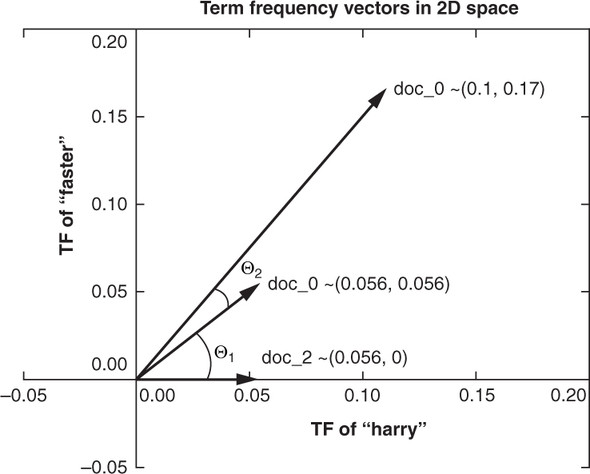

In [202]:
# a.dot(b) == np.linalg.norm(a) * np.linalg.norm(b) / np.cos(theta)

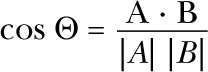

### Zipf's Law

Zipf’s law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table.

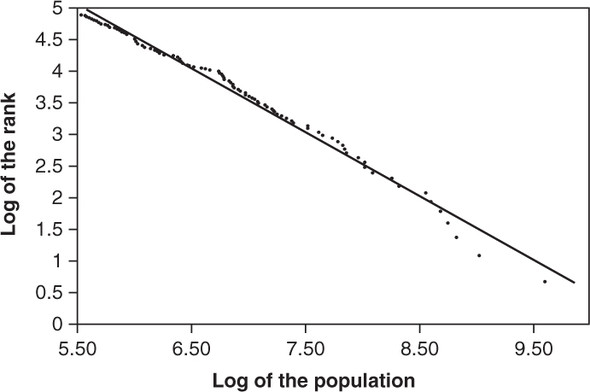

In [203]:
kite_history = """Kites were invented in China, where materials ideal for kite building were readily available: silk fabric for sail material; fine, high-tensile-strength silk for flying line; and resilient bamboo for a strong, lightweight framework.

The kite has been claimed as the invention of the 5th-century BC Chinese philosophers Mozi (also Mo Di) and Lu Ban (also Gongshu Ban). By 549 AD paper kites were certainly being flown, as it was recorded that in that year a paper kite was used as a message for a rescue mission. Ancient and medieval Chinese sources describe kites being used for measuring distances, testing the wind, lifting men, signaling, and communication for military operations. The earliest known Chinese kites were flat (not bowed) and often rectangular. Later, tailless kites incorporated a stabilizing bowline. Kites were decorated with mythological motifs and legendary figures; some were fitted with strings and whistles to make musical sounds while flying. From China, kites were introduced to Cambodia, Thailand, India, Japan, Korea and the western world.

After its introduction into India, the kite further evolved into the fighter kite, known as the patang in India, where thousands are flown every year on festivals such as Makar Sankranti.

Kites were known throughout Polynesia, as far as New Zealand, with the assumption being that the knowledge diffused from China along with the people. Anthropomorphic kites made from cloth and wood were used in religious ceremonies to send prayers to the gods. Polynesian kite traditions are used by anthropologists get an idea of early “primitive” Asian traditions that are believed to have at one time existed in Asia."""

In [204]:
kite_intro = kite_text.lower()
intro_tokens = tokenizer.tokenize(kite_intro)
kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history)
intro_total = len(intro_tokens)
intro_total

361

In [205]:
history_total = len(history_tokens)
history_total

295

In [206]:
intro_tf = {}
history_tf = {}
intro_counts = Counter(intro_tokens)
intro_tf['kite'] = intro_counts['kite'] / intro_total
history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_total

In [207]:
print('Term Frequency of "kite" in intro is: {:.4f}'.format(intro_tf['kite']))

Term Frequency of "kite" in intro is: 0.0388


In [208]:
print('Term Frequency of "kite" in history is: {:.4f}'.format(history_tf['kite']))

Term Frequency of "kite" in history is: 0.0203


In [209]:
intro_tf['and'] = intro_counts['and'] / intro_total
history_tf['and'] = history_counts['and'] / history_total
print('Term Frequency of "and" in intro is: {:.4f}'.format(intro_tf['and']))

Term Frequency of "and" in intro is: 0.0277


In [210]:
print('Term Frequency of "and" in history is: {:.4f}'.format(history_tf['and']))

Term Frequency of "and" in history is: 0.0305


### Inverse Document Frequencey (IDF)

In [221]:
num_docs_containing_and = 0
for doc in [intro_tokens, history_tokens]:
    if 'and' in doc:
        num_docs_containing_and += 1

# num_docs_containing_and

In [222]:
num_docs_containing_kite = 0
for doc in [intro_tokens, history_tokens]:
    if 'kite' in doc:
        num_docs_containing_kite += 1

num_docs_containing_china = 0
for doc in [intro_tokens, history_tokens]:
    if 'china' in doc:
        num_docs_containing_china += 1

In [223]:
intro_tf['kite'] = intro_counts['kite'] / intro_total
history_tf['kite'] = history_counts['kite'] / history_total
intro_tf['china'] = intro_counts['china'] / intro_total
history_tf['china'] = history_counts['china'] / history_total

In [224]:
num_docs = 2
intro_idf = {}
history_idf = {}
intro_idf['and'] = num_docs / num_docs_containing_and
history_idf['and'] = num_docs / num_docs_containing_and
intro_idf['kite'] = num_docs / num_docs_containing_kite
history_idf['kite'] = num_docs / num_docs_containing_kite
intro_idf['china'] = num_docs / num_docs_containing_china
history_idf['china'] = num_docs / num_docs_containing_china

### TF-IDF

In [227]:
intro_tfidf = {}
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']
intro_tfidf

{'and': 0.027700831024930747, 'kite': 0.038781163434903045, 'china': 0.0}

### log(TF-IDF)

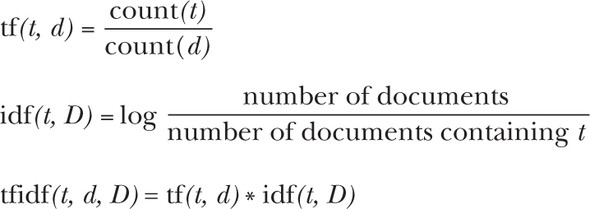

### Relevance Ranking

In [233]:
document_tfidf_vectors = []
for doc in docs:
    vec = copy.copy(zero_vector)
    tokens = tokenizer.tokenize(doc.lower())
    token_counts = Counter(tokens)
    for key, value in token_counts.items():
        docs_containing_key = 0
        for _doc in docs:
            if key in _doc:
                docs_containing_key += 1
        tf = value / len(lexicon)
        if docs_containing_key:
            idf = len(docs) / docs_containing_key
        else:
            idf = 0
        vec[key] = tf * idf
    document_tfidf_vectors.append(vec)
    
# document_tfidf_vectors

### TF-IDF Matrix  using Scikit-learn

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = docs
vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)

# model.todense().round(2)

# Word2Vec

## Learning Objectives

1. Understanding how word vectors are created
2. Visualizing word vectors

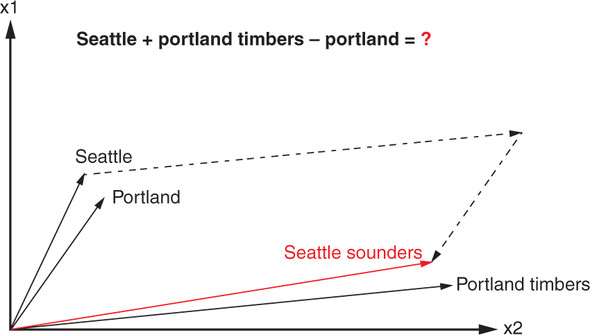

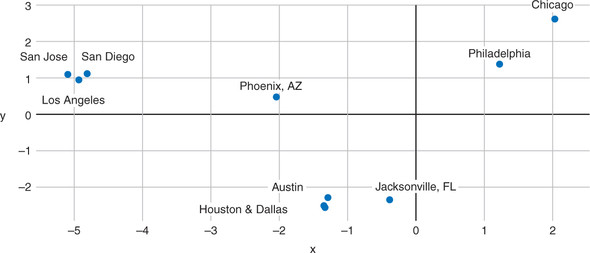

## How to compute Word2vec representations

### Skip-gram

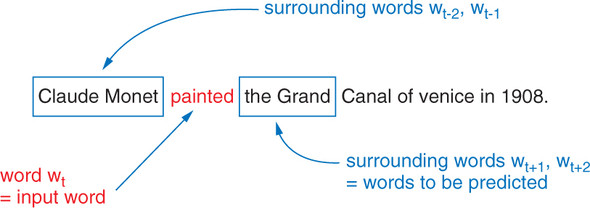

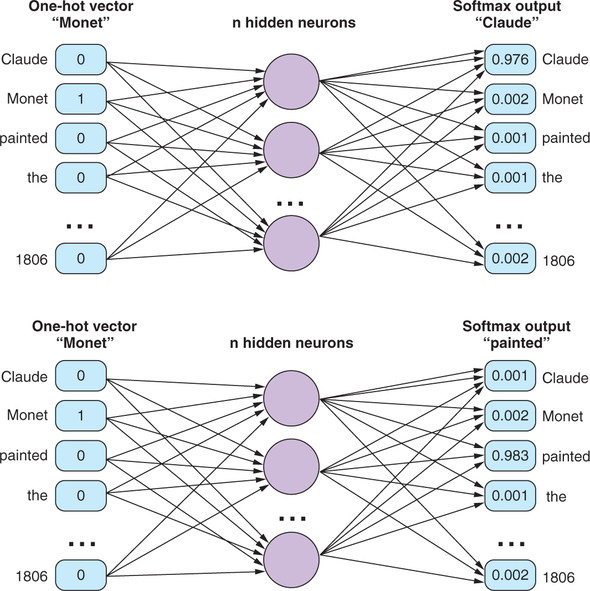

### Continuous bag-of-words (CBOW)

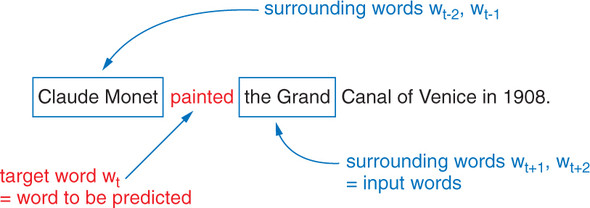